In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.frequent_patterns import apriori

In [2]:
DATA_FILE = 'project1_data.csv'
df = pd.read_csv(DATA_FILE)
df.head()

,order_id,product_id
0,110,Organic Lemon
1,110,Organic Unsweetened Almond Milk
2,110,Beef Top Round Steak
3,110,Cotija
4,110,"Organic Red Radish, Bunch"


### Load, Transform, and Explore the Dataset

---


In [3]:
# Group by order_id and aggregate product_ids into sets
itemsets = df.groupby('order_id')['product_id'].apply(set).tolist()
itemsets[:3]
# data = {
#     'order_id': [1, 1, 2, 2, 2, 3, 3, 3],
#     'product_id': ['A', 'B', 'A', 'B', 'C', 'A', 'B', 'C']
# }

[{'B 12 Liquid B Complex',
  'Banana',
  'Beef Top Round Steak',
  'Cotija',
  'Jalapeno Peppers',
  'Organic Iceberg Lettuce',
  'Organic Lemon',
  'Organic Red Radish, Bunch',
  'Organic Unsweetened Almond Milk',
  'Red Vine Tomato'},
 {'Dark Chocolate Nuts & Sea Salt Bars',
  'Organic Raisin Bran Cereal',
  'Tesora Medium Roast'},
 {'Black Beans',
  'Classic Wheat Bread',
  'Large Burrito Flour Tortillas',
  'Mexican Style Taco Shredded Cheese',
  'Original Kettle Cooked Potato Chips',
  'Original Thin Pepperoni Pizza',
  'Original Thin Sausage & Pepperoni Pizza',
  'Swanson Premium Chicken Breast Chunks'}]

#### Itemset Matrix

In [4]:
# Create itemset matrix using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
itemset_matrix = mlb.fit_transform(itemsets)
itemset_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### Itemset Dataframe

In [5]:
# Create itemset dataframe
itemset_df = pd.DataFrame(itemset_matrix, columns=mlb.classes)
itemset_df

,0,1,2,3,4,5,6,7,8,9,...,25467,25468,25469,25470,25471,25472,25473,25474,25475,25476
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Number of unique orders and products

In [6]:
num_unique_orders = df['order_id'].nunique()
num_unique_products = df['product_id'].nunique()
print(f'Unique Orders: {num_unique_orders}, Unique Products: {num_unique_products}')

Unique Orders: 32149, Unique Products: 25477


#### Histogram of order sizes

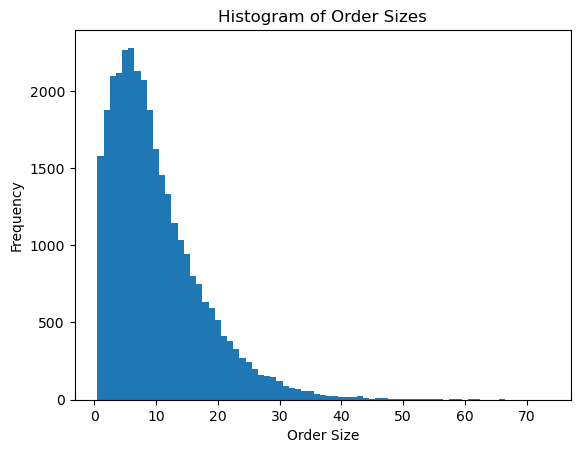

In [7]:
order_sizes = df.groupby('order_id').size()
plt.hist(order_sizes,bins=range(1, order_sizes.max() + 2), align='left')
plt.xlabel('Order Size')
plt.ylabel('Frequency')
plt.title('Histogram of Order Sizes')
plt.show()

#### The distribution is skewed towards larger order sizes (skewed to the right), suggesting that many orders contain a higher number of products

---

#### Top fifty products ordered

In [8]:
top_fifty_products = df['product_id'].value_counts().head(50)
print(f'Top fifty products ordered:')
print(top_fifty_products)

Top fifty products ordered:
Banana                                  4818
Bag of Organic Bananas                  3797
Organic Strawberries                    2715
Organic Baby Spinach                    2530
Organic Hass Avocado                    2136
Organic Avocado                         1794
Large Lemon                             1522
Limes                                   1431
Strawberries                            1411
Organic Raspberries                     1345
Organic Whole Milk                      1344
Organic Yellow Onion                    1213
Organic Garlic                          1110
Organic Zucchini                        1057
Organic Blueberries                      976
Cucumber Kirby                           967
Organic Fuji Apple                       922
Organic Grape Tomatoes                   855
Organic Lemon                            854
Organic Cucumber                         829
Apple Honeycrisp Organic                 810
Organic Baby Carrots       

### The Apriori Algorithm

In [9]:
def instacart_frequent_itemsets(itemset_df, k, min_support):
    frequent_itemsets = apriori(itemset_df.astype(bool), min_support=min_support,use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)
    frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] == k]
    return frequent_itemsets[['support', 'itemsets']]

min_support = 0.004
k = 3
frequent_3_itemsets = instacart_frequent_itemsets(itemset_df, k, min_support)
print(frequent_3_itemsets)

      support              itemsets
489  0.004106  (1633, 15339, 14349)
490  0.004293  (1633, 14349, 16446)
491  0.004604  (1633, 15339, 16446)


### Manual Implementation of the Apriori Algorithm
---

#### Candidate Generation

In [10]:
FI2_FILE = 'frequent_2_itemsets.csv'
df2 = pd.read_csv(FI2_FILE,header=None)
df2.head(3)

,0,1
0,Banana,100% Whole Wheat Bread
1,Bag of Organic Bananas,Apple Honeycrisp Organic
2,Apple Honeycrisp Organic,Banana


In [11]:
# Extract the two columns and turn them into a list of sets
frequent_2_itemsets = [frozenset(itemset) for itemset in [{ row[0], row[1] } for _, row in df2.iterrows()] ]
frequent_2_itemsets[:3]

[frozenset({'100% Whole Wheat Bread', 'Banana'}),
 frozenset({'Apple Honeycrisp Organic', 'Bag of Organic Bananas'}),
 frozenset({'Apple Honeycrisp Organic', 'Banana'})]

In [12]:
# Create a generate_candidate_3_itemsets function, which takes as input a list of frequent 2 itemsets
# and returns a list of the candidate 3 itemsets
def generate_candidate_3_itemsets(frequent_2_itemsets):
    candidate_3_itemsets = set()
    
    # Join 
    for itemset1 in frequent_2_itemsets:
        for itemset2 in frequent_2_itemsets:
            union_set = itemset1.union(itemset2)
            if len(union_set) == 3:
                candidate_3_itemsets.add(frozenset(union_set))
                
    # Prune
    pruned_candidates = set()
    for candidate in candidate_3_itemsets:
        is_frequent_subset = True
        for item in candidate:
            subset = frozenset(candidate - {item})
            if subset not in frequent_2_itemsets:
                is_frequent_subset = False
                break
        if is_frequent_subset:
            pruned_candidates.add(candidate)
            
    return list(pruned_candidates)

In [15]:
generate_candidate_3_itemsets(frequent_2_itemsets)[:3]

[frozenset({'Bag of Organic Bananas',
            'Organic Avocado',
            'Organic Yellow Onion'}),
 frozenset({'Apple Honeycrisp Organic',
            'Organic Baby Spinach',
            'Organic Hass Avocado'}),
 frozenset({'Bag of Organic Bananas', 'Limes', 'Organic Yellow Onion'})]

In [14]:
#